<a href="https://colab.research.google.com/github/Harshitmaury123/Machine_Learning_Lab/blob/main/ML_LAB1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


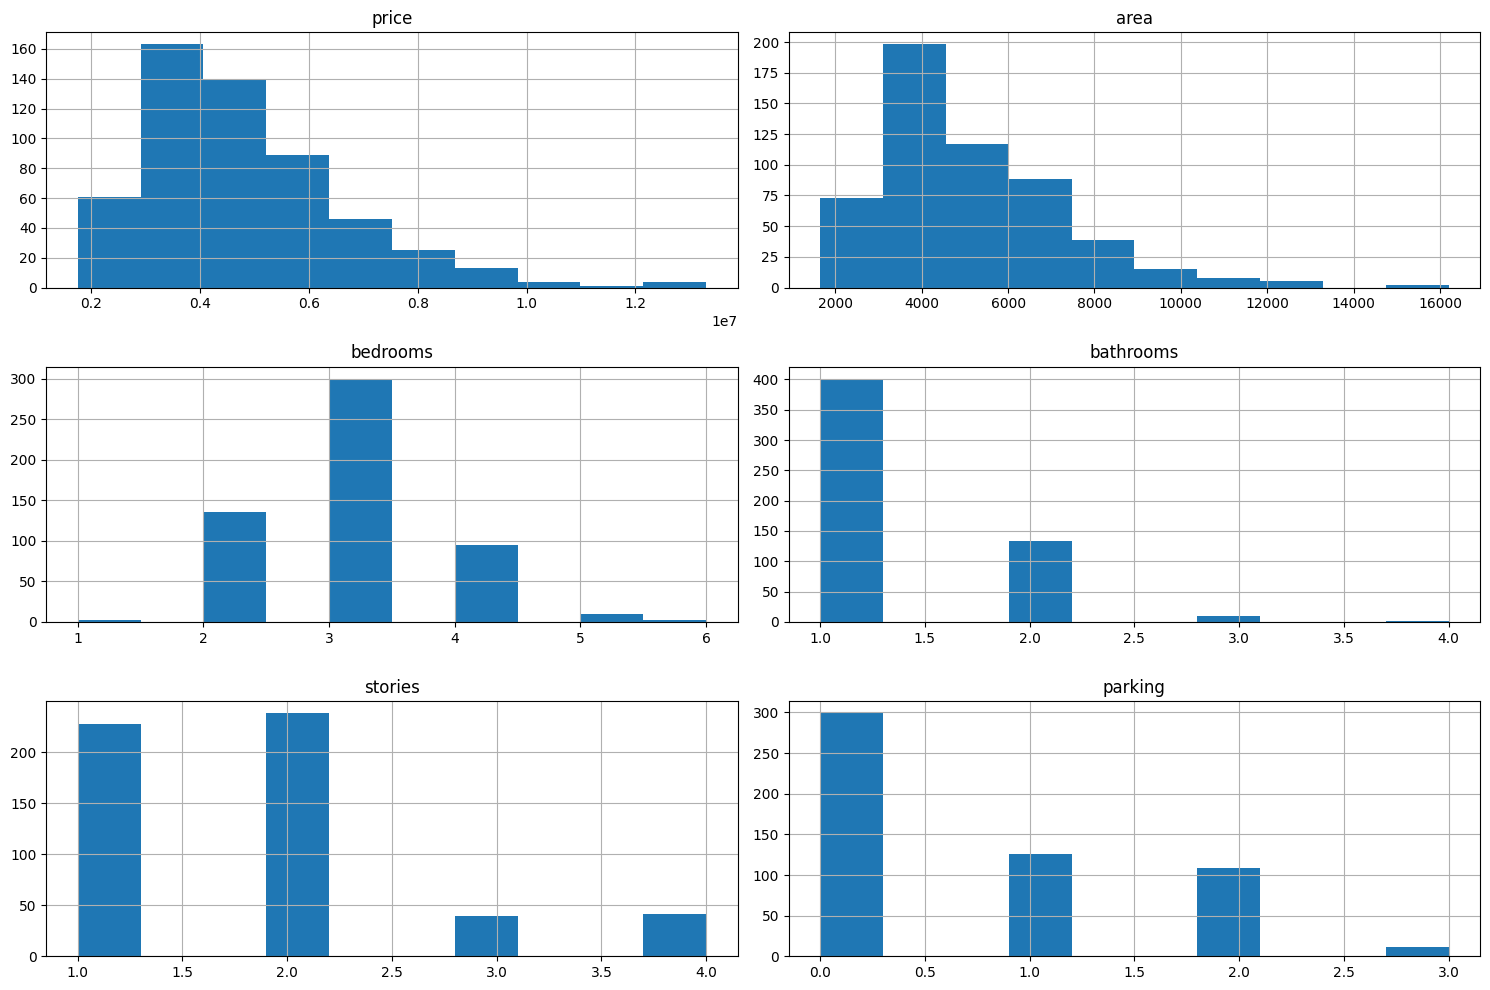

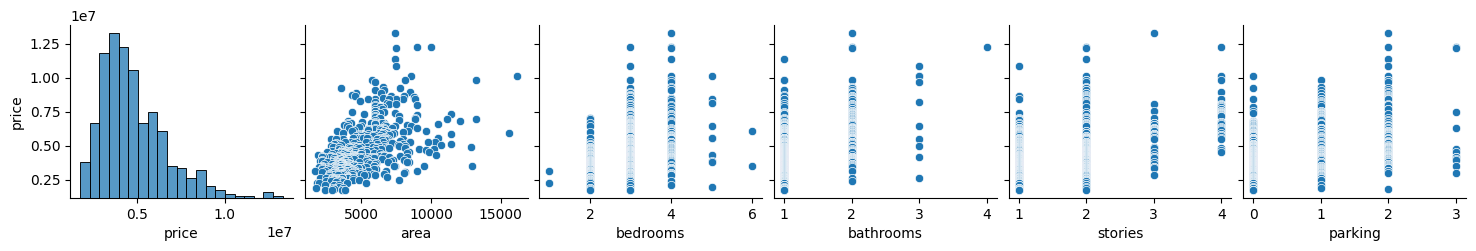

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Visualize the relationship between price and other features
sns.pairplot(df, y_vars=['price'])
plt.show()

In [42]:
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['guestroom']=df['guestroom'].map({'yes':1,'no':0})
df['basement']=df['basement'].map({'yes':1,'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})
df['furnishingstatus']=df['furnishingstatus'].map({'furnished':1,'semi-furnished':2,'unfurnished':3})
df['price'] = (df['price'] - df['price'].mean()) / df['price'].std()
df['area'] = (df['area'] - df['area'].mean()) / df['area'].std()

In [43]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.562174,1.045766,4,2,3,1,0,0,0,1,2,1,1
1,4.000809,1.755397,4,4,4,1,0,0,0,1,3,0,1
2,4.000809,2.216196,3,2,2,1,0,1,0,0,2,1,2
3,3.982096,1.082630,4,2,2,1,0,1,0,1,3,1,1
4,3.551716,1.045766,4,1,2,1,1,1,0,1,2,0,1


In [44]:
x=df.drop('price',axis=1)
y=df['price']

In [45]:
import numpy as np
def Linear_Regression(x,y):
  weights=np.zeros((1,x.shape[1])) #(1,3)
  bias=0
  learning_rate=4e-5
  iterations=20000
  for i in range(iterations):
   y_pred=np.dot(weights,x.T)+bias #(1,3)*(3,200) -> (1,200)
   loss=np.mean((y-y_pred)**2)   #(1,)
   print('-'*100)
   print(loss)
   print('-'*100)
   dw=2*(y_pred-y).dot(x)
   db=2*np.mean(y_pred-y)
   weights=weights-learning_rate*dw
   bias=bias-learning_rate*db
  return weights,bias

In [46]:
y=np.array(y)
x=np.array(x)
w,b=Linear_Regression(x,y)

print(b)
print(w)

Streaming output truncated to the last 5000 lines.
0.3857309776830643
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
0.3857307181231943
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
0.3857304585643391
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
0.38573019900649885
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
0.38572993944967326
--------------------------------------------

In [47]:
def predict(x):
  y_pred= np.dot(w,x.T)+b
  return y_pred

y=df['price']
x=df.drop('price',axis=1)
y_pred=predict(x)
y=np.array(y)
y_pred=y_pred.T
y.shape,y_pred.shape

((545,), (545, 1))

In [48]:
mse=np.mean((y-y_pred)**2)
print(mse)

1.6057706655389852
